In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
data = pd.read_csv("cardio_train.csv", sep=";")

In [ ]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [ ]:
X = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].values
X[0:5]

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, 6.2000e+01, 1.1000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, 8.5000e+01, 1.4000e+02,
        9.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, 6.4000e+01, 1.3000e+02,
        7.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.7623e+04, 2.0000e+00, 1.6900e+02, 8.2000e+01, 1.5000e+02,
        1.0000e+02, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.7474e+04, 1.0000e+00, 1.5600e+02, 5.6000e+01, 1.0000e+02,
        6.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
y = data['cardio']
y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

prediction and Evaluation

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[6736 3839]
 [3837 6283]]


In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

Accuracy :  0.6290891519690747


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     10575
           1       0.62      0.62      0.62     10120

    accuracy                           0.63     20695
   macro avg       0.63      0.63      0.63     20695
weighted avg       0.63      0.63      0.63     20695



Here if we choose value of K Then

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

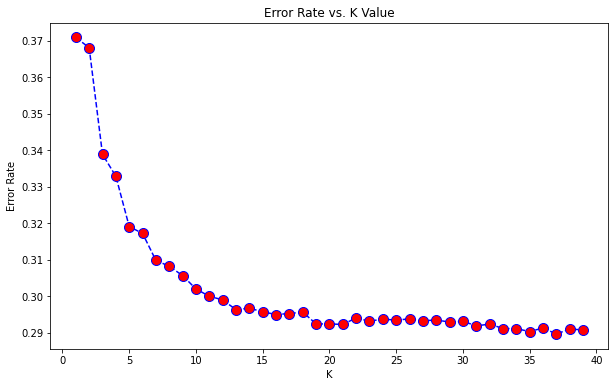

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[8252 2323]
 [3796 6324]]


              precision    recall  f1-score   support

           0       0.68      0.78      0.73     10575
           1       0.73      0.62      0.67     10120

    accuracy                           0.70     20695
   macro avg       0.71      0.70      0.70     20695
weighted avg       0.71      0.70      0.70     20695

